# Imports And Consts

In [7]:
RESULTS_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
]

In [8]:
import functions
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import xgboost as xgb

# Load Data

load the training and test data in a format specified by task description

In [9]:
with open("./Dataset/x_test.txt") as file:
    X_test = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/x_train.txt") as file:
    X_train = [[float(digit) for digit in line.split()] for line in file]


with open("./Dataset/y_train.txt") as file:
    y_train = [[float(digit) for digit in line.split()] for line in file]

In the X_test there are 500 features and 5000 observations, y_train contains 5000 values, X_train contains 500 features and 5000 observations

In [10]:
print("X_test datapoints:", len(X_test), " features:", len(X_test[0]))
print("X_train datapoints:", len(X_train), " features:", len(X_train[0]))
print("y_train datapoints:", len(y_train))

X_test datapoints: 5000  features: 500
X_train datapoints: 5000  features: 500
y_train datapoints: 5000


# Batch 1

## Consts

In [11]:
RESULTS_FILENAME = "./Results/Limited/ExtraTrees/results-1"

## Experiment

### Parameters

In [27]:
n_estimators = [100, 400]
criterion = ["gini", "entropy", "log_loss"]
max_depth = [None, 3, 5]
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]
min_weight_fraction_leaf = [0, 0.1, 0.001]
max_features = [None, "sqrt", "log2"]
max_leaf_nodes = [None, 1, 2]
min_impurity_decrease = [0, 0.1, 0.001]
bootstrap = [True, False]
oob_score = [True, False]
random_state = [42]
class_weight = [None, "balanced", "balanced_subsample"]
ccp_alpha = [0, 0.1, 0.001]

extraTreesParameters = functions.generateParameters(
    [
        n_estimators,
        criterion,
        max_depth,
        min_samples_split,
        min_samples_leaf,
        min_weight_fraction_leaf,
        max_features,
        max_leaf_nodes,
        min_impurity_decrease,
        bootstrap,
        oob_score,
        random_state,
        class_weight,
        ccp_alpha,
    ],
    globals(),
)
activation = ["relu"]


solver = ["adam"]
alpha = [0.3]
learning_rate = ["adaptive"]
learning_rate_init = [0.008]
hidden_layer_sizes = [
    (13,),
]
max_iter = [1600]
random_state = [42]
mlpClassifierParameters = functions.generateParameters(
    [
        activation,
        solver,
        alpha,
        learning_rate,
        learning_rate_init,
        hidden_layer_sizes,
        max_iter,
        random_state,
    ],
    globals(),
)

models = [
    {"model": functions.ModelType.ExtraTrees, "parameters": extraTreesParameters},
    {"model": functions.ModelType.MLPClassifier, "parameters": mlpClassifierParameters},
]

In [28]:
# KBest
k = [2]
score_func = [mutual_info_classif]
kBestParameters = functions.generateParameters([score_func, k], globals())

# FPR

# mutual_info_classif seems to break for FPR but maybe try to run these without StandardScaler?
score_func = [f_classif]
alpha = [0.01]
fprParameters = functions.generateParameters([score_func, alpha], globals())


# RFE
estimator = [SVC(kernel="linear")]
n_features_to_select = [2, 3]
step = [0.9]
rfeParameters = functions.generateParameters(
    [estimator, n_features_to_select, step], globals()
)


featureSelectors = [
    {"model": functions.FeatureSelectorType.KBest, "parameters": kBestParameters},
    # {"model": functions.FeatureSelectorType.FPR, "parameters": fprParameters},
    # {"model": functions.FeatureSelectorType.RFE, "parameters": rfeParameters},
]

In [29]:
scalers = [
    # {"model": functions.Scaler.NoScaling, "parameters": [{}]},
    # {"model": functions.Scaler.Standard, "parameters": [{}]},
    {"model": functions.Scaler.Robust, "parameters": [{}]},
]

degree = [2]

polynomialParameters = functions.generateParameters([degree], globals())

featureGenerators = [
    {"model": functions.FeatureGenerator.NoFeatureGeneration, "parameters": [{}]},
    #{
     #   "model": functions.FeatureGenerator.Polynomial,
      #  "parameters": polynomialParameters,
    #},
]

### Conducting the experiment

In [30]:
y_train_ravel = np.ravel(y_train, order="C")
y_train_ravel = y_train_ravel.astype(int)

In [31]:
%%time
results = functions.conductExperimentsWithScalersAndGenerators(
    models=models,
    featureSelectors=featureSelectors,
    X_orig=X_train,
    y_orig=y_train_ravel,
    scalers=scalers,
    featureGenerators=featureGenerators,
    getLimitedScore=True,
    limit=0.45,
)
with open(RESULTS_FILENAME, "wb") as f:
    pickle.dump(results, f)

Performed Experiment 1/209953(approx) took (s): model: 0.5 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 2/209953(approx) took (s): model: 0.62 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 3/209953(approx) took (s): model: 0.62 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootst

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 5/209953(approx) took (s): model: 0.65 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 6/209953(approx) took (s): model: 0.64 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, '

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 8/209953(approx) took (s): model: 0.91 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 9/209953(approx) took (s): model: 0.87 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decre

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 11/209953(approx) took (s): model: 0.58 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 12/209953(approx) took (s): model: 0.61 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'boo

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 14/209953(approx) took (s): model: 0.74 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 15/209953(approx) took (s): model: 0.68 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 17/209953(approx) took (s): model: 0.66 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 18/209953(approx) took (s): model: 0.67 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_de

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 28/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 29/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 30/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 31/209953(approx) took (s): model: 0.32 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 32/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 33/209953(approx) took (s): model: 0.26 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 34/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 35/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 36/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 37/209953(approx) took (s): model: 0.16 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 38/209953(approx) took (s): model: 0.19 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 39/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 40/209953(approx) took (s): model: 0.19 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 41/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 42/209953(approx) took (s): model: 0.19 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 43/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 44/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 45/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': False, 'oob_score': True,

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 56/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 57/209953(approx) took (s): model: 0.31 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.00

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 59/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 60/209953(approx) took (s): model: 0.24 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 62/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 63/209953(approx) took (s): model: 0.38 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 65/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 66/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.00

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 68/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 69/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 71/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 72/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 83/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 84/209953(approx) took (s): model: 0.32 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap':

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 86/209953(approx) took (s): model: 0.31 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 87/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'boot

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 89/209953(approx) took (s): model: 0.34 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 90/209953(approx) took (s): model: 0.37 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 92/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 93/209953(approx) took (s): model: 0.21 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 95/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 96/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'boots

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 98/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 99/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 109/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 110/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 111/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 112/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 113/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 114/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 115/209953(approx) took (s): model: 0.48 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 116/209953(approx) took (s): model: 0.43 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 117/209953(approx) took (s): model: 0.42 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 118/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 119/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 120/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 121/209953(approx) took (s): model: 0.21 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 122/209953(approx) took (s): model: 0.21 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 123/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 124/209953(approx) took (s): model: 0.58 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 125/209953(approx) took (s): model: 0.58 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 126/209953(approx) took (s): model: 0.6 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': False, 'oob_score': True, 'rand

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 137/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 138/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, '

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 140/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 141/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 143/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 144/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_dec

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 146/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 147/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 149/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 150/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 152/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 153/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': None, 'max_leaf_nodes': 2, 'min_impurity_de

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 164/209953(approx) took (s): model: 0.56 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 165/209953(approx) took (s): model: 0.67 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0,

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 167/209953(approx) took (s): model: 0.6 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 168/209953(approx) took (s): model: 0.63 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 170/209953(approx) took (s): model: 0.7 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 171/209953(approx) took (s): model: 0.73 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurit

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 173/209953(approx) took (s): model: 0.5 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 174/209953(approx) took (s): model: 0.53 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0,

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 176/209953(approx) took (s): model: 0.53 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 177/209953(approx) took (s): model: 0.54 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrea

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 179/209953(approx) took (s): model: 0.62 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 180/209953(approx) took (s): model: 0.65 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impur

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 190/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 191/209953(approx) took (s): model: 0.24 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 192/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 193/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 194/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 195/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 196/209953(approx) took (s): model: 0.36 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 197/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 198/209953(approx) took (s): model: 0.36 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 199/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_im

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 200/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 201/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 202/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 203/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrea

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 204/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 205/209953(approx) took (s): model: 0.36 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 206/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 207/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'bootstrap': False, 'oob_score': T

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 218/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 219/209953(approx) took (s): model: 0.24 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 221/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 222/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_dec

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 224/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 225/209953(approx) took (s): model: 0.33 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_im

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 227/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 228/209953(approx) took (s): model: 0.16 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 231/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 232/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 233/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 234/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_i

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 245/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 246/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'boot

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 248/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 249/209953(approx) took (s): model: 0.21 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0,

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 251/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 252/209953(approx) took (s): model: 0.38 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_dec

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 254/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 255/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'boo

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 258/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 259/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 260/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 261/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_de

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 271/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 272/209953(approx) took (s): model: 0.21 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 273/209953(approx) took (s): model: 0.24 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 274/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 275/209953(approx) took (s): model: 0.25 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 276/209953(approx) took (s): model: 0.26 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 277/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 278/209953(approx) took (s): model: 0.36 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 279/209953(approx) took (s): model: 0.35 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 280/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 281/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 282/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, '

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 283/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 284/209953(approx) took (s): model: 0.16 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 285/209953(approx) took (s): model: 0.2 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 286/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 287/209953(approx) took (s): model: 0.3 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}


c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 288/209953(approx) took (s): model: 0.28 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.001} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
!!!Experiment failed for: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.1, 'bootstrap': False, 'oob_score': True, 

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 299/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 300/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.00

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 302/209953(approx) took (s): model: 0.22 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 303/209953(approx) took (s): model: 0.23 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease'

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 305/209953(approx) took (s): model: 0.32 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 306/209953(approx) took (s): model: 0.34 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 308/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 309/209953(approx) took (s): model: 0.17 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 311/209953(approx) took (s): model: 0.19 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 312/209953(approx) took (s): model: 0.18 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 314/209953(approx) took (s): model: 0.27 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.001, 'bootstrap': True, 'oob_score': False, 'random_state': 42, 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 315/209953(approx) took (s): model: 0.29 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_impurit

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 326/209953(approx) took (s): model: 0.68 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': None, 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 327/209953(approx) took (s): model: 0.77 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0,

c:\Users\Patryk\Repos\advml-proj-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performed Experiment 329/209953(approx) took (s): model: 0.87 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'bootstrap': True, 'oob_score': True, 'random_state': 42, 'class_weight': 'balanced', 'ccp_alpha': 0.1} Scaler.Robust {} FeatureGenerator.NoFeatureGeneration {}
Performed Experiment 330/209953(approx) took (s): model: 0.8 selector 11.17 with: FeatureSelectorType.KBest {'score_func': <function mutual_info_classif at 0x0000017DB5788FE0>, 'k': 2} ModelType.ExtraTrees {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease

KeyboardInterrupt: 

## Results

In [ ]:
with open(RESULTS_FILENAME, "rb") as input_file:
    results = pickle.load(input_file)

In [ ]:
resultsDf = pd.DataFrame(
    results,
    columns=functions.RESULTS_COLUMNS,
)

### Detailed Results

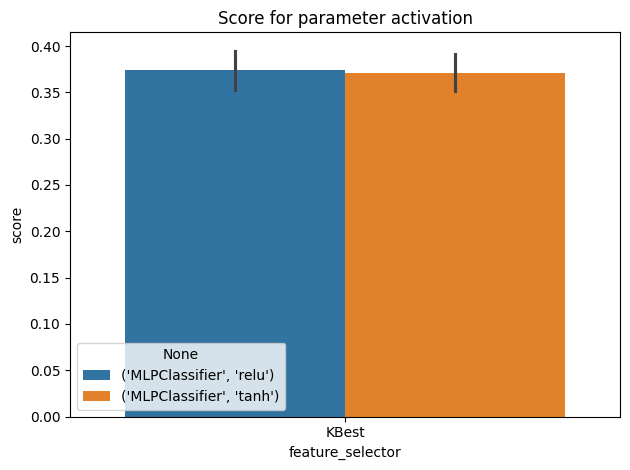

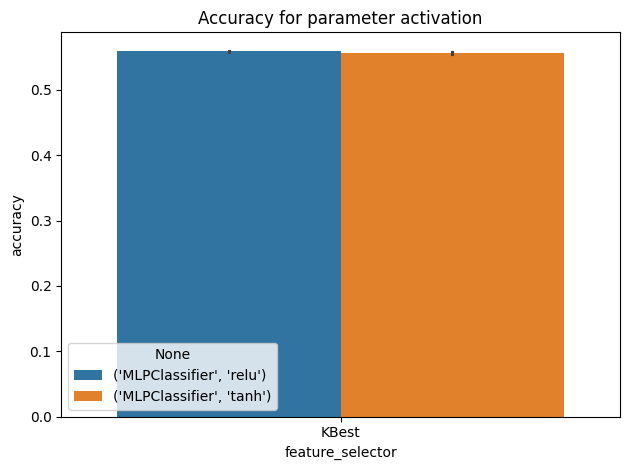

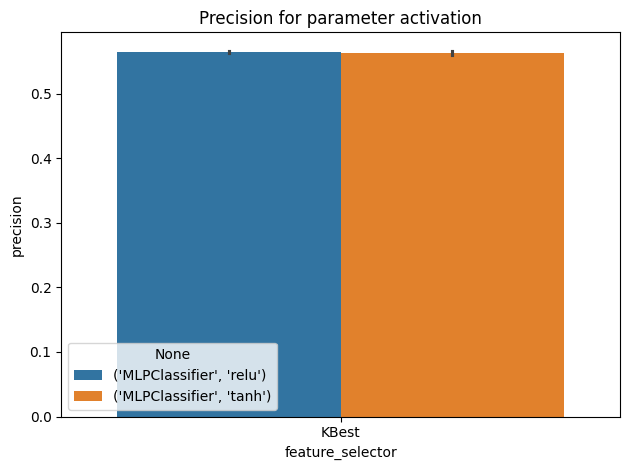

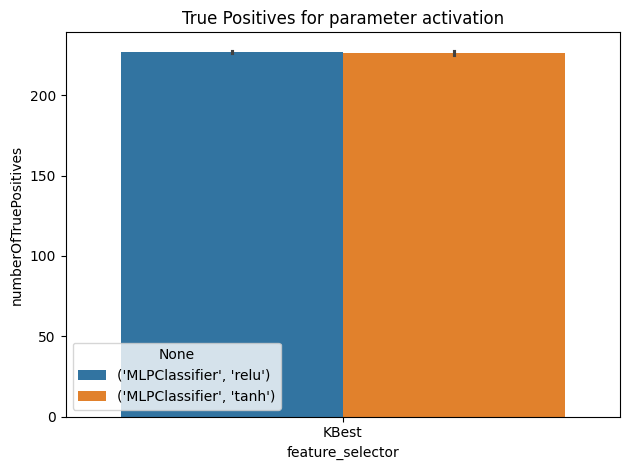

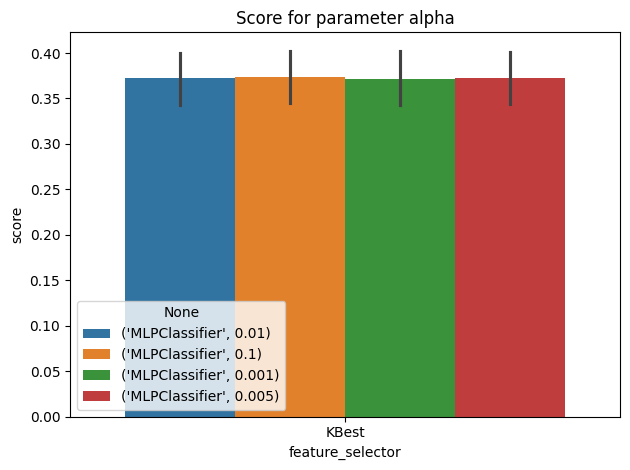

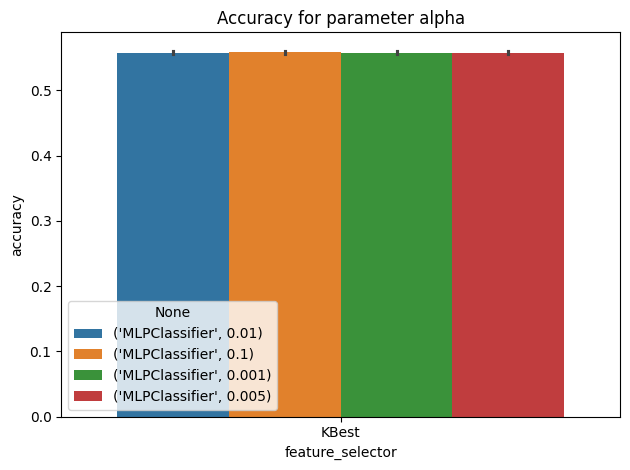

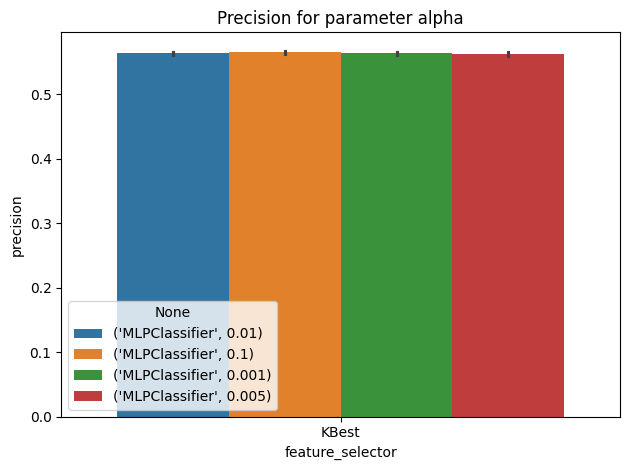

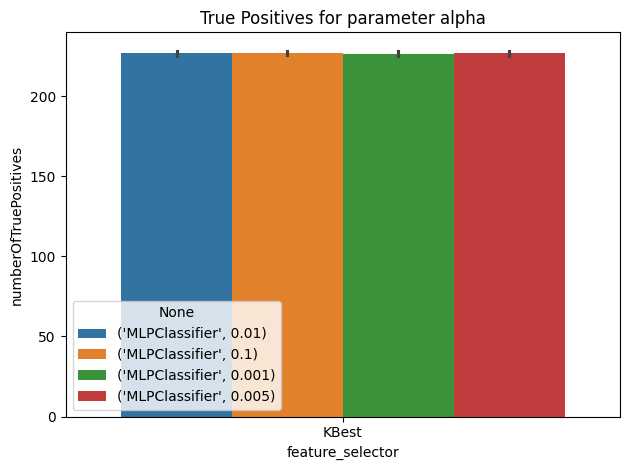

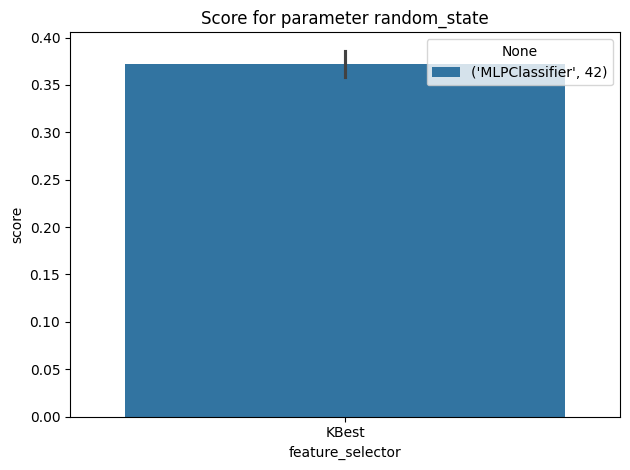

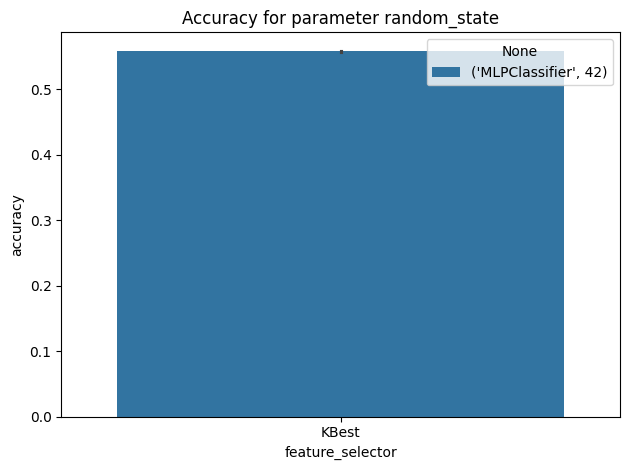

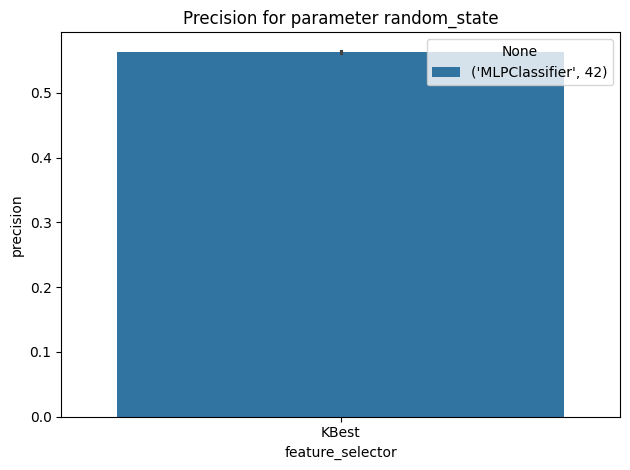

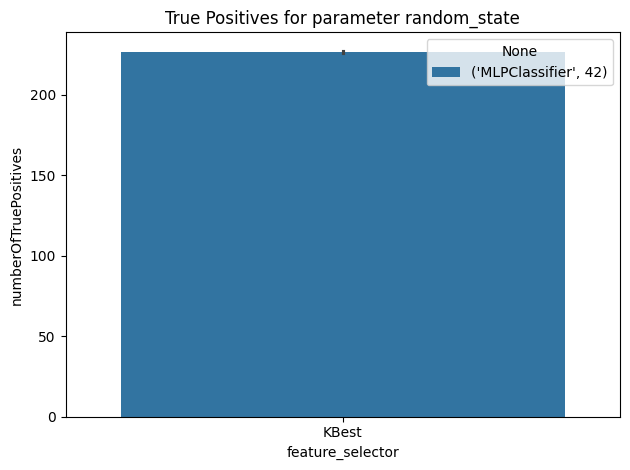

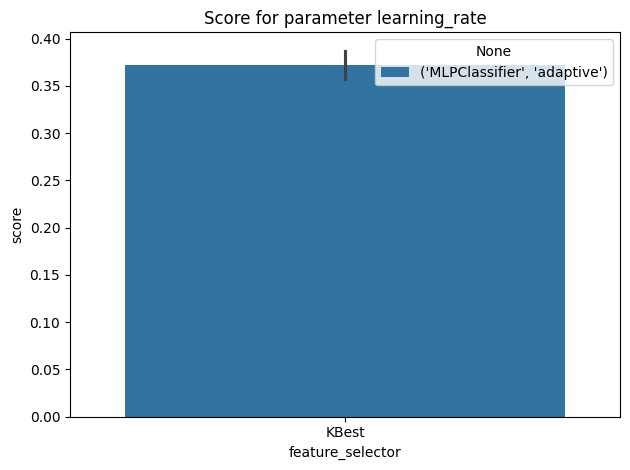

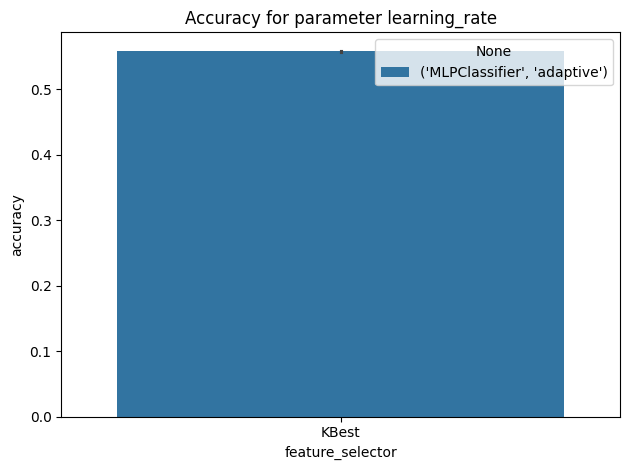

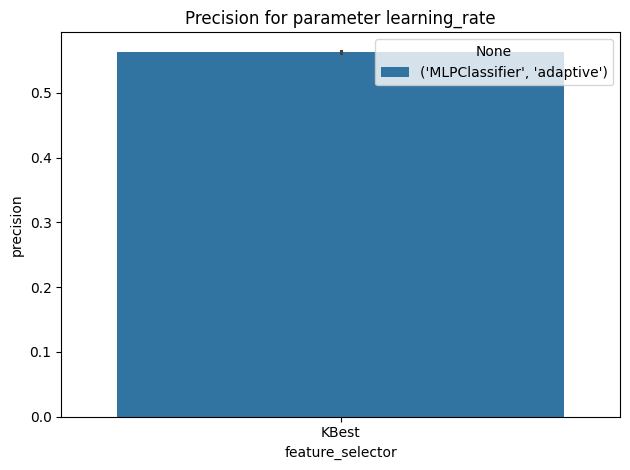

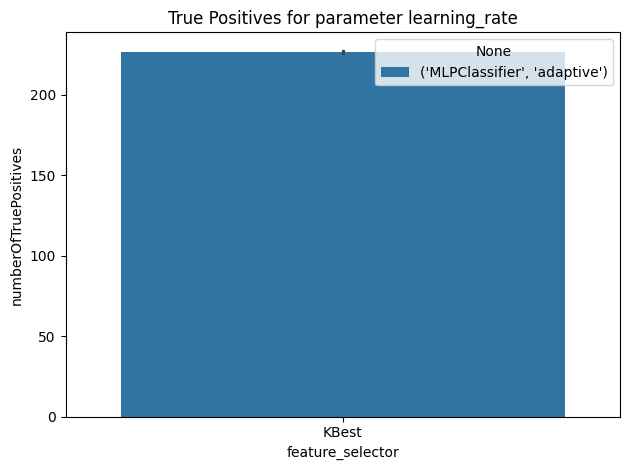

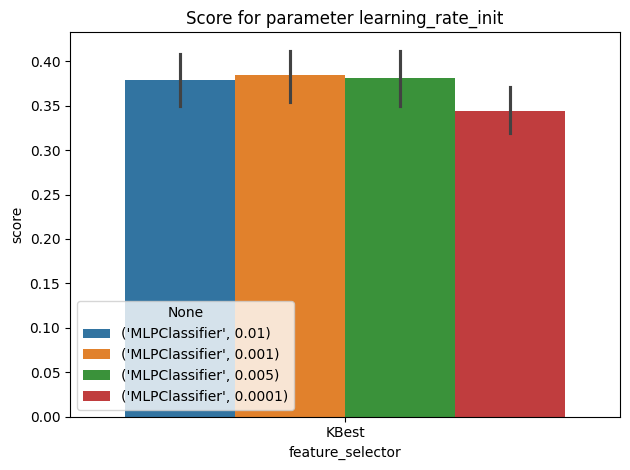

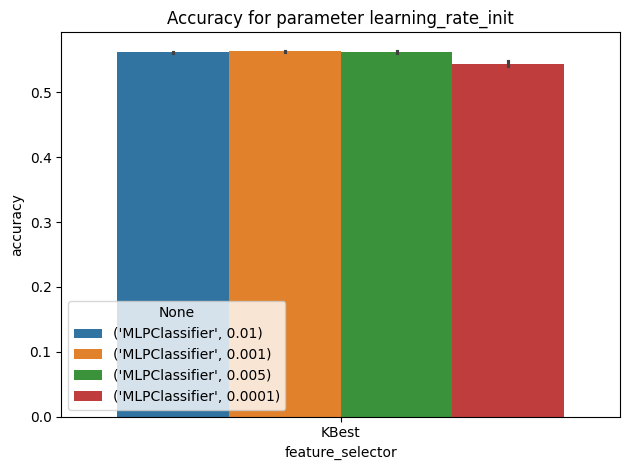

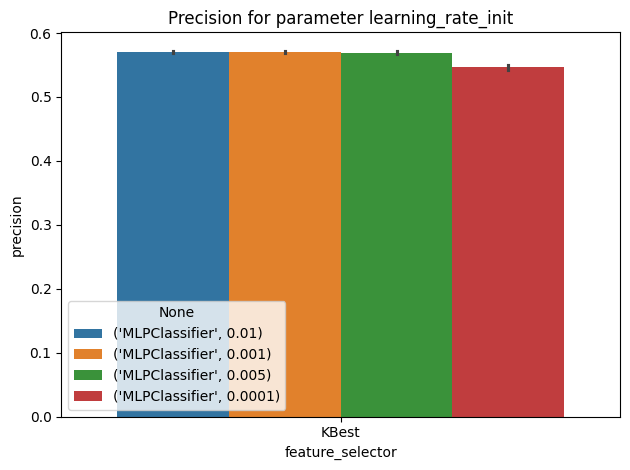

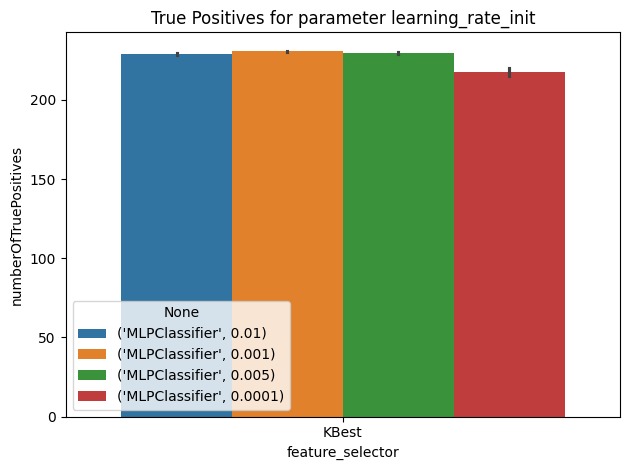

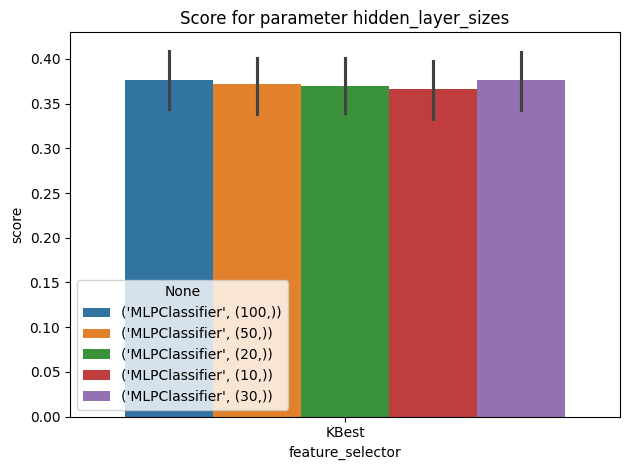

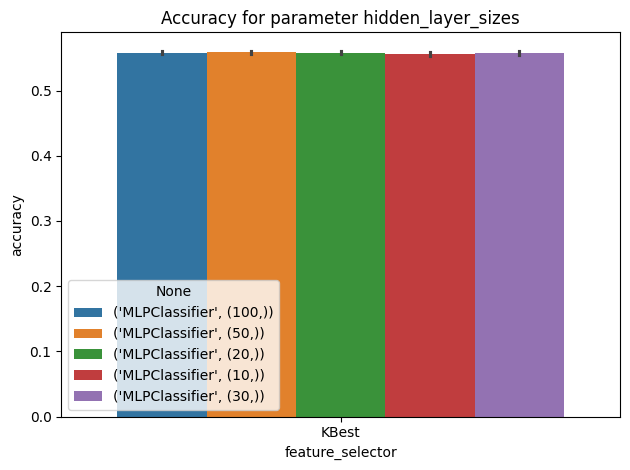

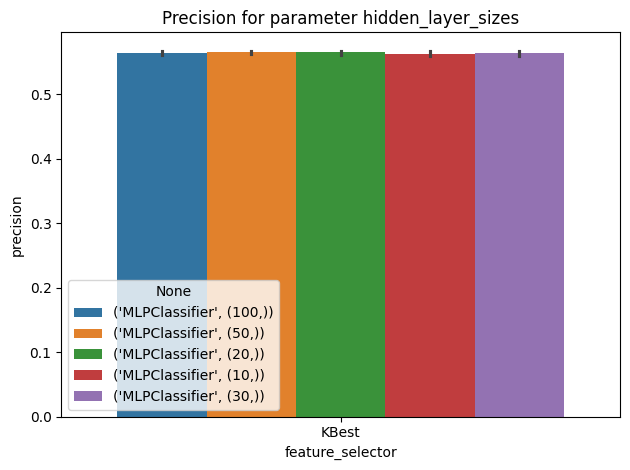

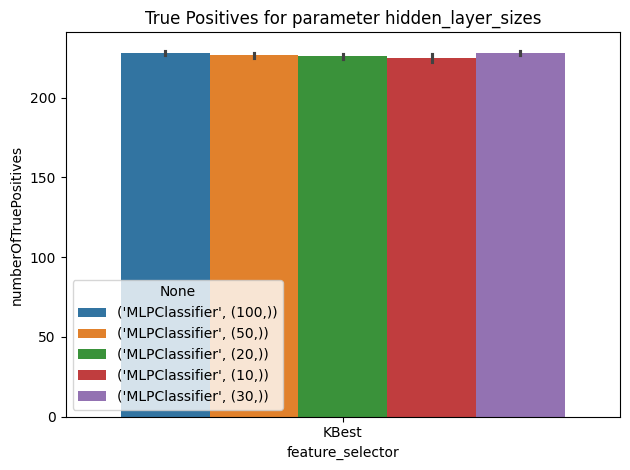

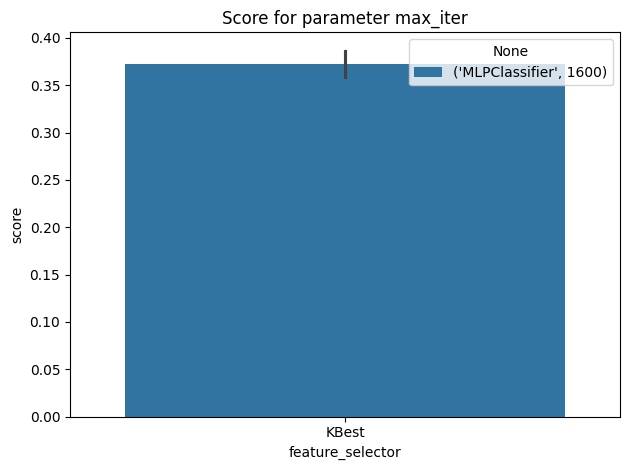

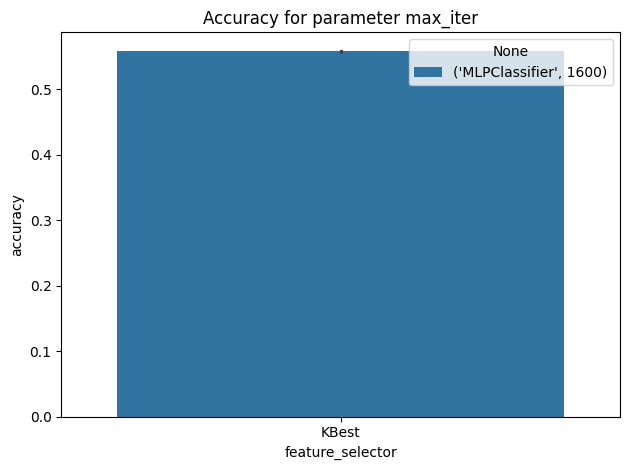

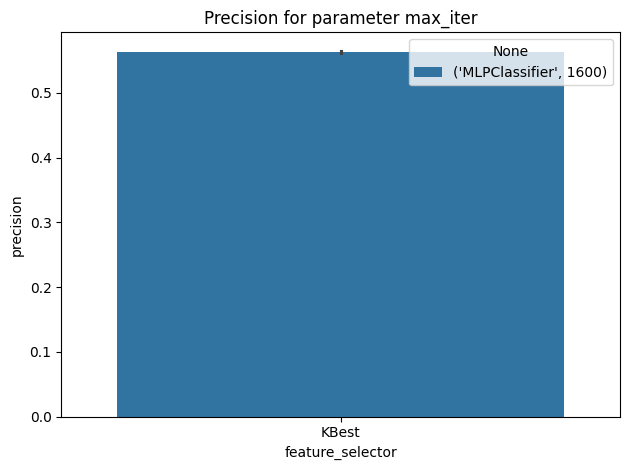

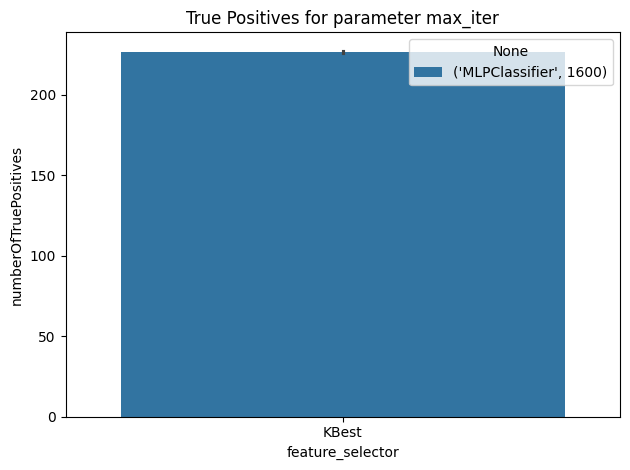

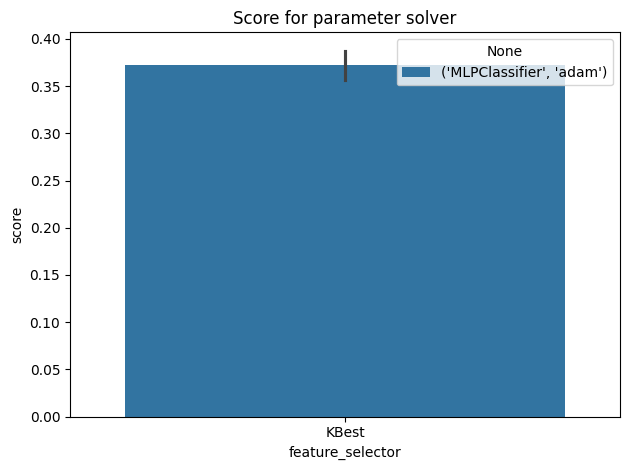

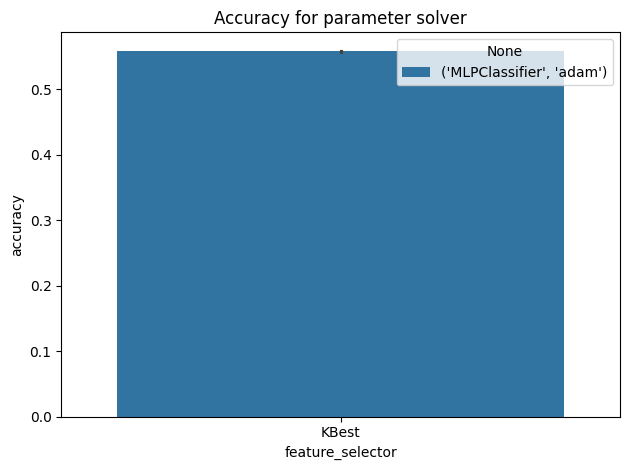

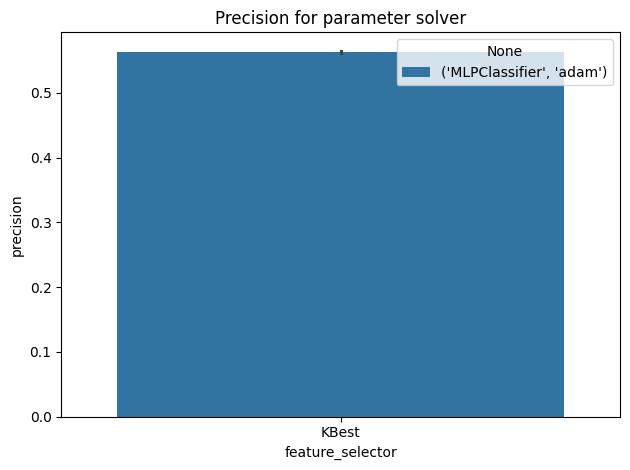

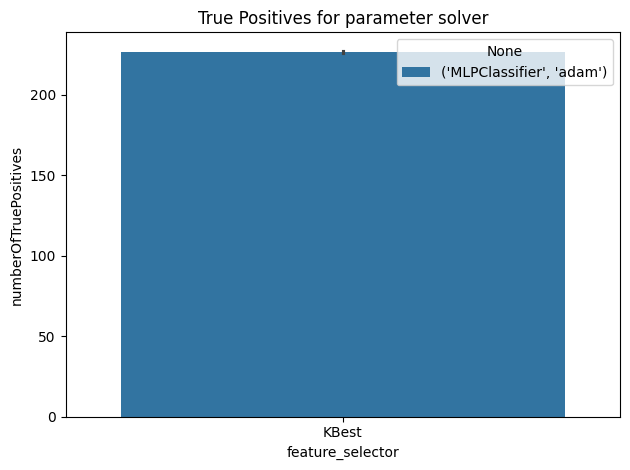

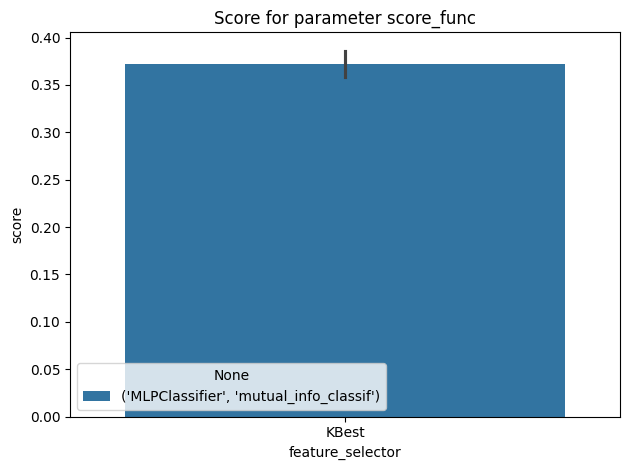

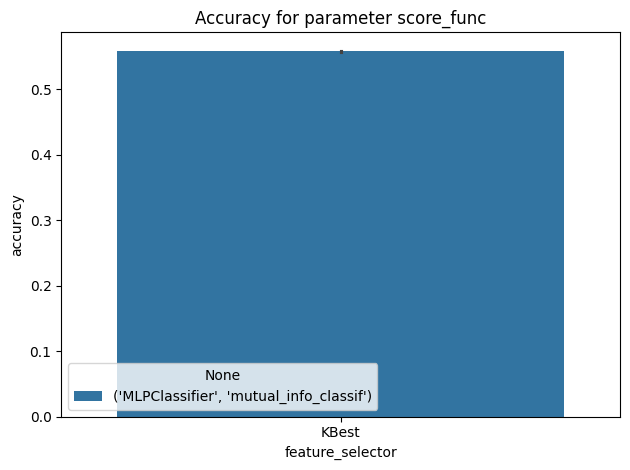

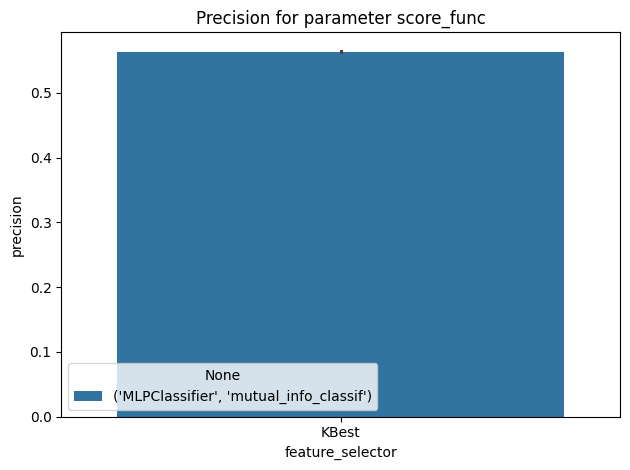

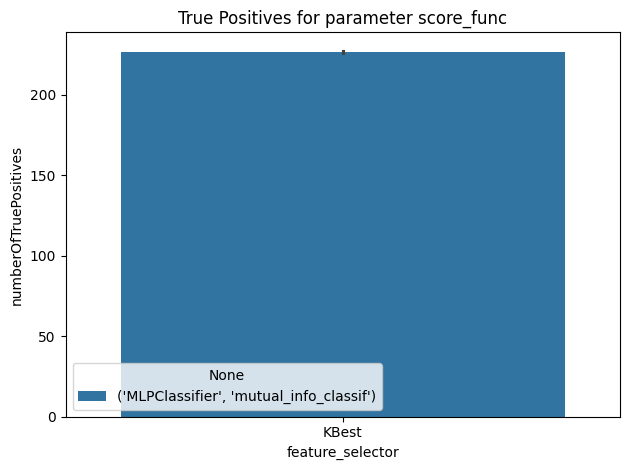

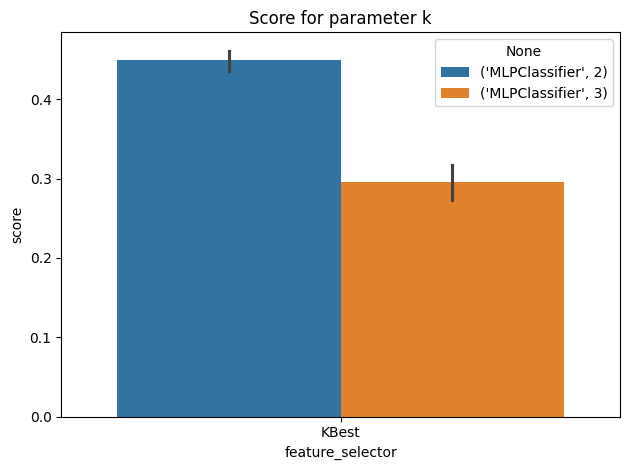

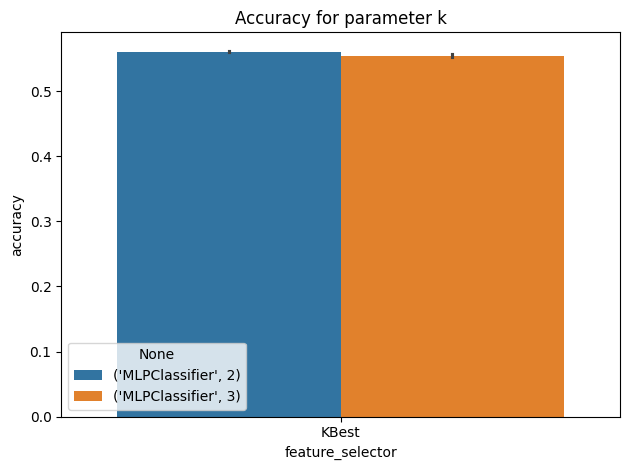

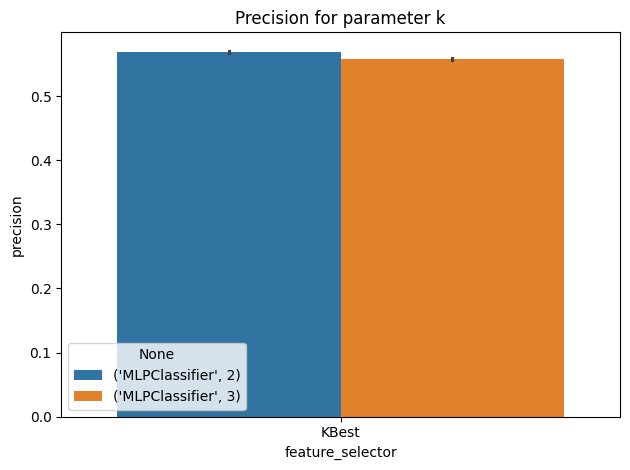

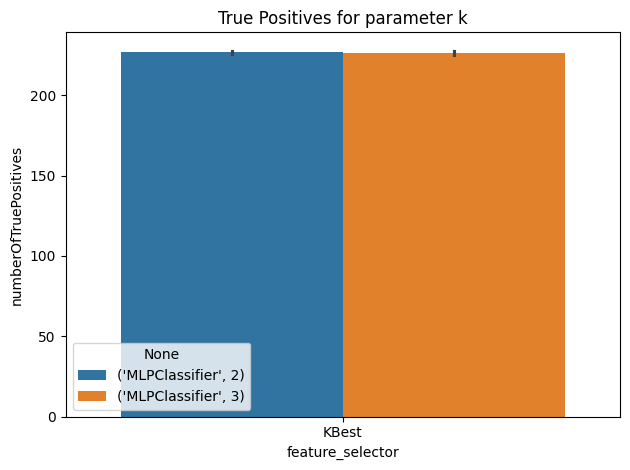

TypeError: boolean value of NA is ambiguous

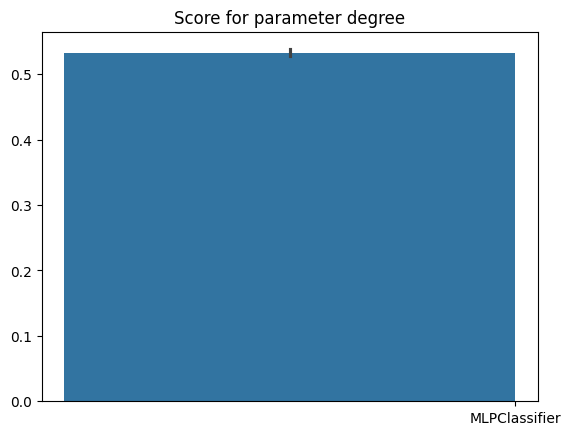

In [ ]:
%%time
processedResultsDf, parameters = functions.extractParameterResultsArr(
    resultsDf,
    [models, featureSelectors, scalers, featureGenerators],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)
functions.drawParameterResultsBarplot(processedResultsDf, parameters)

### Score/Accuracy by number of features

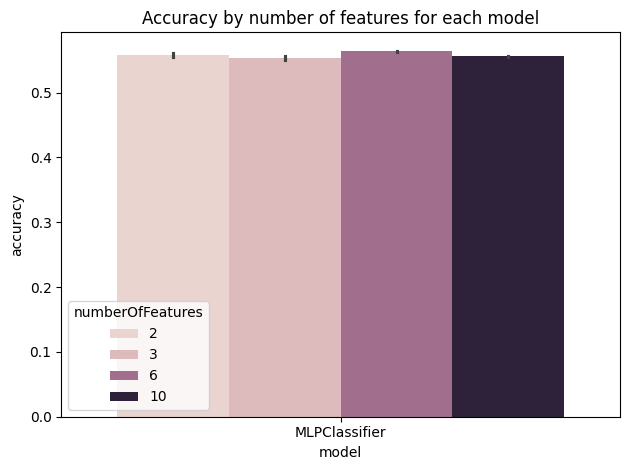

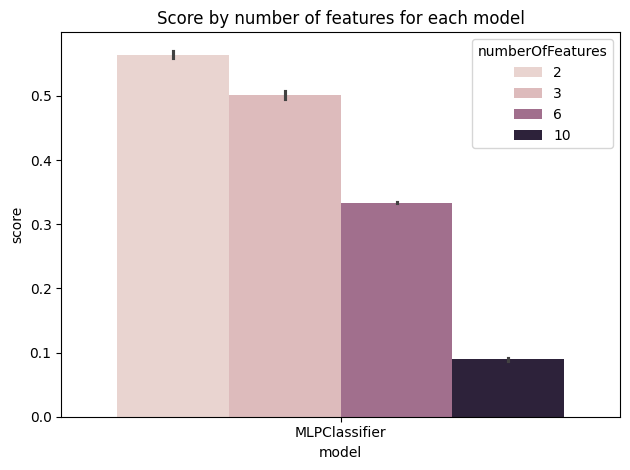

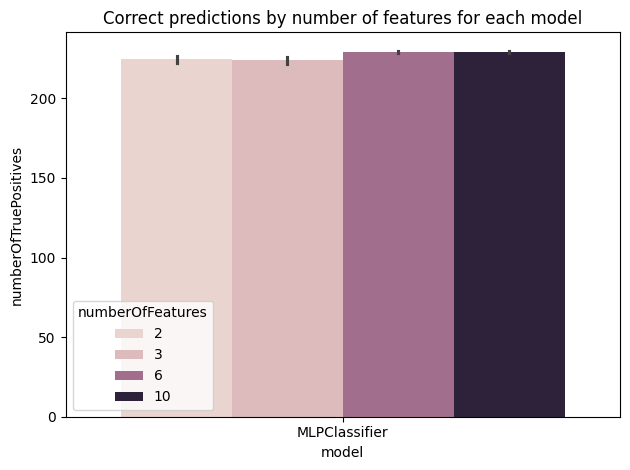

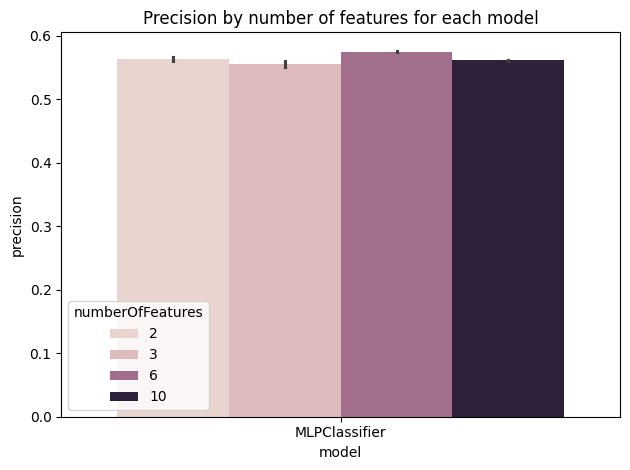

In [ ]:
functions.drawResultsPerNumberOfFeatures(processedResultsDf)

### Final Results for Feature Selectors

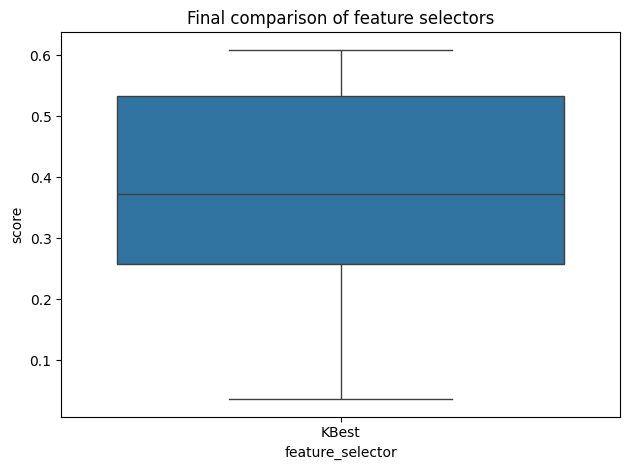

In [ ]:
plt.title("Final comparison of feature selectors")
sns.boxplot(data=processedResultsDf, x="feature_selector", y="score")

plt.tight_layout()
plt.show()

<Axes: xlabel='model', ylabel='score'>

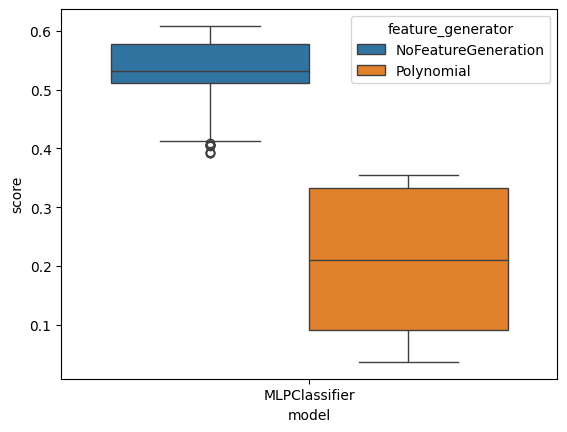

In [ ]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="feature_generator")

<Axes: xlabel='model', ylabel='score'>

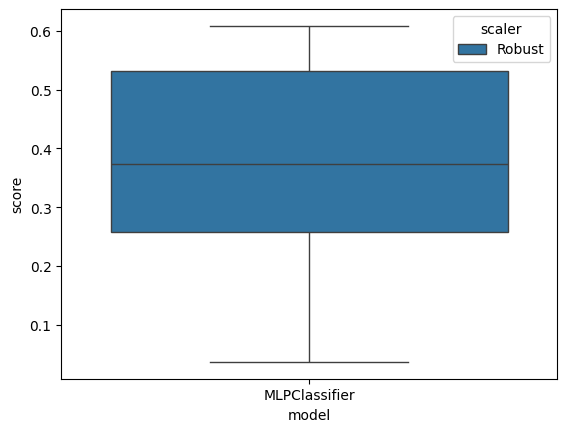

In [ ]:
sns.boxplot(data=processedResultsDf, x="model", y="score", hue="scaler")

### Final Results for Models

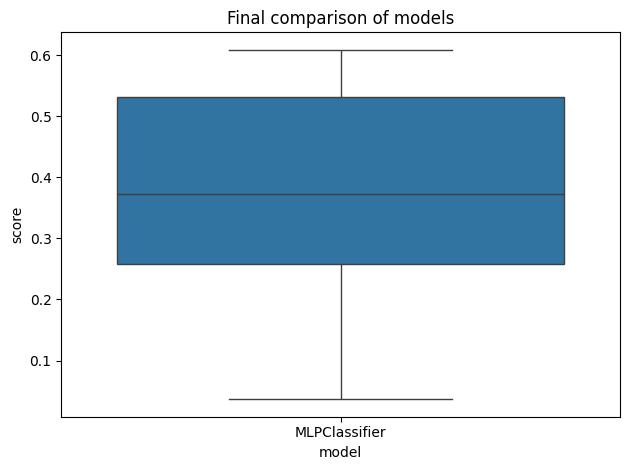

In [ ]:
plt.title("Final comparison of models")
sns.boxplot(data=processedResultsDf, x="model", y="score")
plt.tight_layout()
plt.show()

### Final Results

In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 927 µs


In [ ]:
processedResultsDf[
    processedResultsDf["model"] == functions.ModelType.XGBoost.name
].sort_values(by="score", ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree


In [ ]:
processedResultsDf.sort_values(by="numberOfTruePositives", ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree
102,0.608563,239,0.561818,0.576355,2,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.100,42,adaptive,0.010,"(20,)",1600,adam,mutual_info_classif,2,<NA>
389,0.544343,238,0.559394,0.561210,3,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.005,42,adaptive,0.001,"(30,)",1600,adam,mutual_info_classif,3,<NA>
383,0.544343,238,0.556364,0.552632,3,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.005,42,adaptive,0.010,"(10,)",1600,adam,mutual_info_classif,3,<NA>
523,0.116208,238,0.560606,0.569678,10,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.001,42,adaptive,0.010,"(10,)",1600,adam,mutual_info_classif,3,2
323,0.544343,238,0.558788,0.555000,3,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.010,42,adaptive,0.010,"(10,)",1600,adam,mutual_info_classif,3,<NA>


In [ ]:
processedResultsDf[
    processedResultsDf["feature_generator"]
    == functions.FeatureGenerator.Polynomial.name
].sort_values(by="numberOfTruePositives", ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree
523,0.116208,238,0.560606,0.569678,10,MLPClassifier,"{'activation': 'relu', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.001,42,adaptive,0.010,"(10,)",1600,adam,mutual_info_classif,3,2
628,0.113150,237,0.561818,0.571649,10,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.005,42,adaptive,0.001,"(10,)",1600,adam,mutual_info_classif,3,2
603,0.113150,237,0.549091,0.555556,10,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.001,42,adaptive,0.010,"(10,)",1600,adam,mutual_info_classif,3,2
568,0.113150,237,0.561818,0.571649,10,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.010,42,adaptive,0.001,"(10,)",1600,adam,mutual_info_classif,3,2
588,0.113150,237,0.563030,0.576244,10,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.100,42,adaptive,0.001,"(10,)",1600,adam,mutual_info_classif,3,2


In [ ]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree


In [ ]:
filteredDf["scaler"]

102    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (20,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [ ]:
filteredDf["feature_generator"]

102    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree
102,0.608563,239,0.561818,0.576355,2,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.1,42,adaptive,0.01,"(20,)",1600,adam,mutual_info_classif,2,<NA>


In [ ]:
%%time
filteredDf = functions.filterDataframeByBestResults(processedResultsDf)

CPU times: total: 0 ns
Wall time: 999 µs


In [ ]:
processedResultsDf[
    processedResultsDf["scaler"] == functions.Scaler.NoScaling.name
].sort_values(by="score", ascending=False).head(5)

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree


In [ ]:
filteredDf["scaler"]

102    Robust
Name: scaler, dtype: object

In [ ]:
filteredDf["model_parameters"].to_numpy()

array([{'activation': 'tanh', 'solver': 'adam', 'alpha': 0.1, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (20,), 'max_iter': 1600, 'random_state': 42}],
      dtype=object)

In [ ]:
filteredDf["feature_generator"]

102    NoFeatureGeneration
Name: feature_generator, dtype: object

In [ ]:
filteredDf

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,scaler,...,model_parameters_alpha,model_parameters_random_state,model_parameters_learning_rate,model_parameters_learning_rate_init,model_parameters_hidden_layer_sizes,model_parameters_max_iter,model_parameters_solver,selector_parameters_score_func,selector_parameters_k,feature_generator_parameters_degree
102,0.608563,239,0.561818,0.576355,2,MLPClassifier,"{'activation': 'tanh', 'solver': 'adam', 'alph...",KBest,{'score_func': <function mutual_info_classif a...,Robust,...,0.1,42,adaptive,0.01,"(20,)",1600,adam,mutual_info_classif,2,<NA>
